# motivation

I spent two hours daily driving on one of the busiest motorway, when commuting to work was still a norm. For a novice driver, how to safely drive along goods vehicles was one of first lessons I learnt after leaving the driving school. When I came across this dataset on cbs website, it immediately attracted my attenion as it reminded me of the days when the 'lorry drivers' kept me challenged and most of the time provided me with accompany.

- is there any link between goods vehicle and Dutch economy
- what is the average age of goods vehicle? Is it any lower than a private car?
- what is the service life of a lorry, how does it compare to a passenager car? 

In [69]:
import cbsodata
from pathlib import Path
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_palette("husl")

In [70]:
# Downloading table list from cbs portal
df = pd.DataFrame(cbsodata.get_data('84651ENG'))

In [71]:
df.head()

,ID,LorriesAndRoadTractors,YearsOfConstruction,Periods,TotalKilometresInTheNetherlands_1,KilometresByDutchVehicles_2,KilometresByForeignVehicles_3,TotalKilometresByDutchVehicles_4,KilometresInTheNetherlands_5,KilometresAbroad_6,TotalAverageAnnualKilometres_7,AverageAnnualKilometresInNetherlands_8,AverageAnnualKilometresAbroad_9,DutchGoodsVehiclesInUse_10
0,0,Lorries and road tractors,Total of all construction years,2001,6592.1,6014.7,577.5,9869.7,6014.7,3855.1,58913.0,35902.0,23011.0,167530.0
1,1,Lorries and road tractors,Total of all construction years,2002,6600.8,5999.6,601.1,9973.7,5999.6,3974.1,59846.0,36000.0,23846.0,166657.0
2,2,Lorries and road tractors,Total of all construction years,2003,6610.0,6025.4,584.6,10026.9,6025.4,4001.5,61150.0,36746.0,24403.0,163974.0
3,3,Lorries and road tractors,Total of all construction years,2004,6684.5,6060.0,624.5,10070.7,6060.0,4010.7,61637.0,37090.0,24547.0,163387.0
4,4,Lorries and road tractors,Total of all construction years,2005,6797.2,6128.7,668.5,10181.2,6128.7,4052.5,62792.0,37798.0,24994.0,162142.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      1836 non-null   int64  
 1   LorriesAndRoadTractors                  1836 non-null   object 
 2   YearsOfConstruction                     1836 non-null   object 
 3   Periods                                 1836 non-null   object 
 4   TotalKilometresInTheNetherlands_1       954 non-null    float64
 5   KilometresByDutchVehicles_2             954 non-null    float64
 6   KilometresByForeignVehicles_3           954 non-null    float64
 7   TotalKilometresByDutchVehicles_4        954 non-null    float64
 8   KilometresInTheNetherlands_5            954 non-null    float64
 9   KilometresAbroad_6                      954 non-null    float64
 10  TotalAverageAnnualKilometres_7          954 non-null    floa

imported table contains 14 columns. 

3 categorical data for goods vechile type, years of contruction and a time stamp (periods)

10 columns numerical data for the vehicle kilometers

In [73]:
# Downloading metadata
metadata_data_properties = pd.DataFrame(cbsodata.get_meta('84651ENG', 'DataProperties'))
metadata_data_properties[['Key','Title','Description']]

,Key,Title,Description
0,LorriesAndRoadTractors,Lorries and road tractors,
1,YearsOfConstruction,Years of construction,
2,Periods,Periods,
3,,Kilometres in the Netherlands,The total distance travelled (in km) in the Ne...
4,TotalKilometresInTheNetherlands_1,Total kilometres in the Netherlands,The total distance travelled (in km) in the Ne...
5,KilometresByDutchVehicles_2,Kilometres by Dutch vehicles,None
6,KilometresByForeignVehicles_3,Kilometres by foreign vehicles,The total distance travelled (in km) by foreig...
7,,Kilometres by Dutch vehicles,The total distance travelled (in km) in the Ne...
8,TotalKilometresByDutchVehicles_4,Total kilometres by Dutch vehicles,The total distance travelled (in km) in the Ne...
9,KilometresInTheNetherlands_5,Kilometres in the Netherlands,None


# pre-processing categorical data 

In [74]:
# determine the categorical data columns 
cat_col = df.columns[df.dtypes == 'object']
df[cat_col].describe()

,LorriesAndRoadTractors,YearsOfConstruction,Periods
count,1836,1836,1836
unique,6,17,18
top,Lorry (road tractor not included),2016,2016
freq,306,108,102


## lorries and road tracoter
what are the possible vlues in each categorical data columns 

1. contains 6 different types
2. most frequent is the 'Road tractor'

In [75]:
df['LorriesAndRoadTractors'].unique()

array(['Lorries and road tractors', 'Road tractor',
       'Lorry (road tractor not included)', 'To 10 000 kg',
       '10 000 to 20 000 kg', '20 000 kg or more'], dtype=object)

In [76]:
df_goupby_vechile_type = df.groupby(['LorriesAndRoadTractors']).sum()['DutchGoodsVehiclesInUse_10']

In [77]:
df_goupby_vechile_type

LorriesAndRoadTractors
10 000 to 20 000 kg                  1295550.0
20 000 kg or more                     987069.0
Lorries and road tractors            5914882.0
Lorry (road tractor not included)    2936908.0
Road tractor                         2977974.0
To 10 000 kg                          654290.0
Name: DutchGoodsVehiclesInUse_10, dtype: float64

In [78]:
df_goupby_vechile_type['Road tractor'] + df_goupby_vechile_type['Lorry (road tractor not included)'] == df_goupby_vechile_type['Lorries and road tractors']

True

In [79]:
df_goupby_vechile_type["Lorry (road tractor not included)"] /(df_goupby_vechile_type['To 10 000 kg'] + df_goupby_vechile_type['10 000 to 20 000 kg'] + df_goupby_vechile_type['20 000 kg or more'])

0.9999996595059636

obviously 'Lorries and road tractors' is the summation of 'Road tractor' and 'Lorry (road tractor not included)'. to avoid double-counting the values, it is decided to drop the rows where the vehicle type is 'Lorries and road tractors'

Other than that, 'To 10 000 kg' and '10 t to 20 t', '20 t' are sub-cat of the tractor types. it is decided to drop the corresponding rows

In [80]:
df.drop(df[df['LorriesAndRoadTractors'] == 'Lorries and road tractors'].index, axis=0, inplace=True)
df.drop(df[df['LorriesAndRoadTractors'] == 'To 10 000 kg'].index, axis=0, inplace=True)
df.drop(df[df['LorriesAndRoadTractors'] == '10 000 to 20 000 kg'].index, axis=0, inplace=True)
df.drop(df[df['LorriesAndRoadTractors'] == '20 000 kg or more'].index, axis=0, inplace=True)

In [81]:
pd.DataFrame(cbsodata.get_meta('84651ENG', 'LorriesAndRoadTractors'))

,Key,Title,Description,CategoryGroupID
0,A018938,Lorries and road tractors,Lorry\r\nRigid heavy goods road vehicle with a...,None
1,A018937,Road tractor,"Road motor vehicle, exclusively or primarily d...",None
2,A018936,Lorry (road tractor not included),Rigid heavy goods road vehicle with a gross ve...,None
3,A028272,To 10 000 kg,The total weight of the vehicle (or combinatio...,None
4,A028273,10 000 to 20 000 kg,The total weight of the vehicle (or combinatio...,None
5,A028274,20 000 kg or more,The total weight of the vehicle (or combinatio...,None


In [82]:
print(pd.DataFrame(cbsodata.get_meta('84651ENG', 'LorriesAndRoadTractors'))['Description'][2])

Rigid heavy goods road vehicle with a gross vehicle weight above 3500 kg, exclusively or primarily designed to carry goods.


In [83]:
df['LorriesAndRoadTractors'].replace({'Lorry (road tractor not included)':"Lorry"}, inplace = True)

## Years Of Construction

In [84]:
df["YearsOfConstruction"].unique()

array(['Total of all construction years',
       'Year of construction 1900 to 2000',
       'Year of construction 2000 to 2005', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'], dtype=object)

In [85]:
def dimension_size(df, col):
    return len(df[col].unique())

In [86]:
len_Periods = dimension_size(df, 'Periods')
len_LorriesAndRoadTractors = dimension_size(df, "LorriesAndRoadTractors")

if len(df.loc[df["YearsOfConstruction"] == 'Total of all construction years']) == len_Periods* len_LorriesAndRoadTractors:
    print('Total of all construction years present a summation of the other years')

Total of all construction years present a summation of the other years


In [87]:
df = df.drop(df.loc[df["YearsOfConstruction"] == 'Total of all construction years'].index)

## Periods

In [88]:
df["Periods"].unique()  # ordinal data, vechicles recorded from year 2001 up to yera 2018

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'], dtype=object)

# Numerical data

In [89]:
df.head()

if 'ID' in df.columns:
    df = df.drop(['ID'], axis=1)

In [90]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, '0.1f')))

,TotalKilometresInTheNetherlands_1,KilometresByDutchVehicles_2,KilometresByForeignVehicles_3,TotalKilometresByDutchVehicles_4,KilometresInTheNetherlands_5,KilometresAbroad_6,TotalAverageAnnualKilometres_7,AverageAnnualKilometresInNetherlands_8,AverageAnnualKilometresAbroad_9,DutchGoodsVehiclesInUse_10
count,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0
mean,445.2,398.9,46.3,626.6,398.9,227.7,61416.4,40537.8,20878.6,10487.4
std,472.6,423.8,59.4,741.4,423.8,352.7,28600.6,14950.1,15962.4,11809.8
min,21.7,19.7,2.0,26.3,19.7,6.7,5368.0,4743.0,625.0,1742.0
25%,174.1,160.2,11.5,208.1,160.2,46.3,40891.5,29358.5,9374.8,4245.5
50%,277.1,242.9,19.6,355.5,242.9,88.0,59441.0,43855.5,15084.0,6278.0
75%,526.6,462.6,65.5,774.3,462.6,287.4,83278.8,51050.5,32021.5,10414.5
max,2611.0,2492.8,387.6,4481.4,2492.8,2401.1,122680.0,73155.0,73608.0,81535.0


## correlation

<AxesSubplot:>

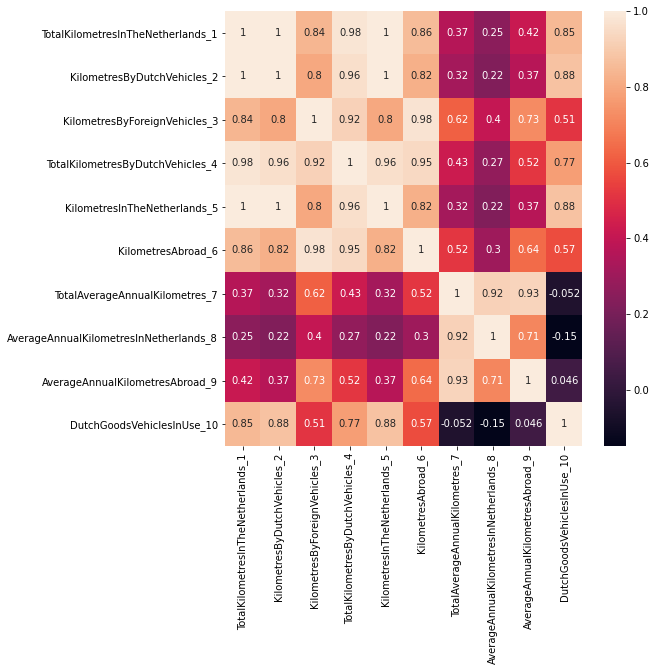

In [91]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True)

quite some information is highly correlated. therefore it is decided to quite 

## drop the highly correlated columns

In [92]:
to_keep = ['LorriesAndRoadTractors', 
        'YearsOfConstruction', 
        'Periods',
        'KilometresByDutchVehicles_2',
        'KilometresByForeignVehicles_3',
        'KilometresInTheNetherlands_5',  
        'KilometresAbroad_6',
        'DutchGoodsVehiclesInUse_10'] 

In [93]:
df = df[to_keep].copy()

## drop NaN

We would like to see if there is any outlier, wrong data included in the dataset, and assign NAN with a reasonable value

In [94]:
# drop NaN columns
df.isna().sum()/df.shape[0]

LorriesAndRoadTractors           0.000000
YearsOfConstruction              0.000000
Periods                          0.000000
KilometresByDutchVehicles_2      0.510417
KilometresByForeignVehicles_3    0.510417
KilometresInTheNetherlands_5     0.510417
KilometresAbroad_6               0.510417
DutchGoodsVehiclesInUse_10       0.510417
dtype: float64

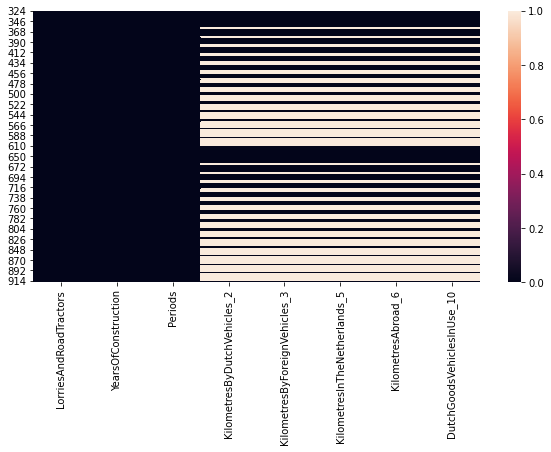

In [95]:
fig, ax = plt.subplots(figsize = (10, 5))


sns.heatmap(df.isnull())
plt.show()

nan values counts for about 50% of the entries, that is quite a significant amount. 

In [96]:
if df.dropna().shape[0] == df.shape[0] - df.isna().sum()[-1]:
    print ('all the nans are in the same rows')

all the nans are in the same rows


# Lorries and tractor types

In [97]:
df_type =  df.groupby(['Periods',"LorriesAndRoadTractors"]).sum()
df_type.reset_index(inplace=True)  # flatten the dataframe

In [98]:
# df_type

In [99]:
# g = sns.FacetGrid(df_type, col='Periods', col_wrap= 6, sharex=True)
# g = g.map(plt.bar, "LorriesAndRoadTractors",'DutchGoodsVehiclesInUse_10')

<AxesSubplot:xlabel='Periods', ylabel='KilometresByDutchVehicles_2'>

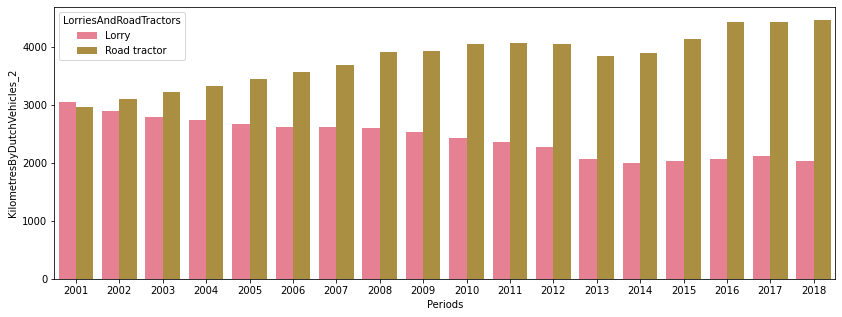

In [100]:
# change it to be a stacked barplot
fig, ax = plt.subplots(figsize = (14, 5))
sns.barplot(x="Periods", y="KilometresByDutchVehicles_2", 
             hue="LorriesAndRoadTractors",  data=df_type)

<AxesSubplot:xlabel='Periods', ylabel='KilometresByForeignVehicles_3'>

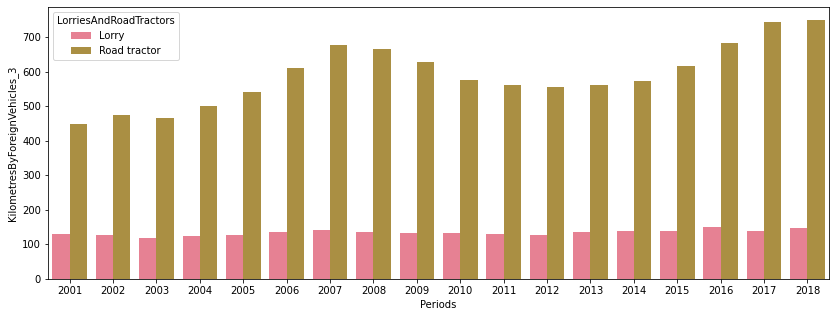

In [101]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.barplot(x="Periods", y="KilometresByForeignVehicles_3", 
             hue="LorriesAndRoadTractors",  data=df_type)

In [102]:
df_type['AverageAnnualKilometer'] = (df_type['KilometresInTheNetherlands_5'] + df_type['KilometresAbroad_6'])/df_type['DutchGoodsVehiclesInUse_10']

Text(0, 0.5, 'Average annual kilometer outside the netherlands')

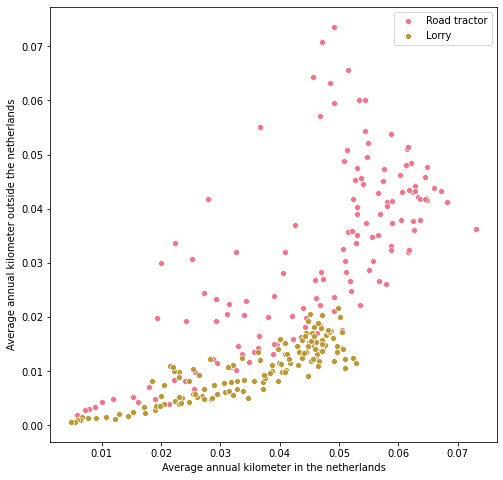

In [103]:
# add labels for x and y axis 
fig, ax = plt.subplots(figsize = (8, 8))

for lorries in df['LorriesAndRoadTractors'].unique():
    
    sns.scatterplot( x = df.loc[df['LorriesAndRoadTractors'] == lorries]['KilometresInTheNetherlands_5']/df.loc[df['LorriesAndRoadTractors'] == lorries]['DutchGoodsVehiclesInUse_10'], 
                y = df.loc[df['LorriesAndRoadTractors'] == lorries]['KilometresAbroad_6']/df.loc[df['LorriesAndRoadTractors'] == lorries]['DutchGoodsVehiclesInUse_10'], label = lorries)
    
ax.set_xlabel('Average annual kilometer in the netherlands')
ax.set_ylabel('Average annual kilometer outside the netherlands')

observations:

- more frequently travel in the neterlands than abroad
- to 10kg good vechile travels is more likely to be found for country-wise transportation
- road trator most likely to be abroad than the rest. 

## distribution of construction year

In [104]:
df_construction =  df.groupby(['Periods','YearsOfConstruction']).sum()
# df_construction.reset_index(inplace=True)  # flatten the dataframe

In [105]:
df_construction = df.pivot_table(index='Periods', columns='YearsOfConstruction', values='DutchGoodsVehiclesInUse_10')

## service life - construction 2005

In [106]:
df_cons2005 = df.loc[df['YearsOfConstruction'] == '2005']

<AxesSubplot:xlabel='Periods', ylabel='DutchGoodsVehiclesInUse_10'>

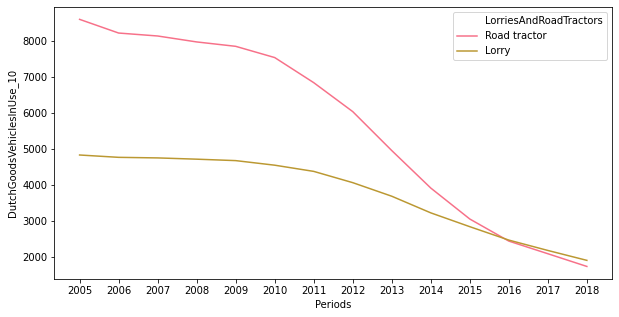

In [107]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(x="Periods", y="DutchGoodsVehiclesInUse_10", 
             hue="LorriesAndRoadTractors", data=df_cons2005)

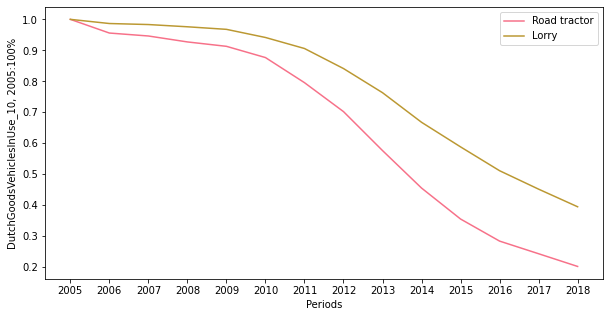

In [108]:
goods_vehicles = df_cons2005['LorriesAndRoadTractors'].unique()

fig, ax = plt.subplots(figsize = (10, 5))

for goods_vehicle in goods_vehicles:
    
    df_ = df_cons2005[df_cons2005['LorriesAndRoadTractors'] == goods_vehicle].dropna()

    periods = df_['Periods']
    values = df_['DutchGoodsVehiclesInUse_10'].values
    
    plt.plot(periods, values/values[0], label=goods_vehicle)

ax.set_xlabel('Periods')
ax.set_ylabel('DutchGoodsVehiclesInUse_10, 2005:100%')
ax.legend()
# ax.set_yscale('log')

road tractors obviously in use for a shorter time than the other types of vehicles

1. 50% of road tractor became out of service after 8 years, for heavier vechiles it is normally 11 years.  
2. to do: check if the same trend is present in the other years

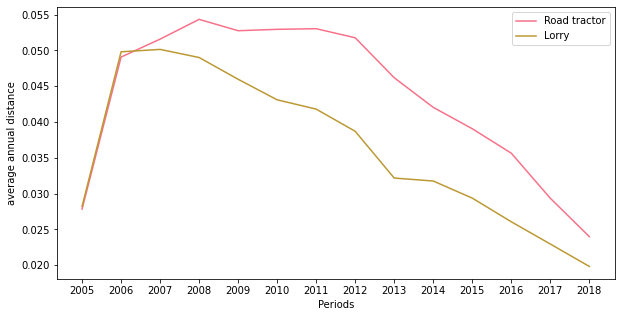

In [109]:
# average annual kilometers distance
goods_vehicles = df_cons2005['LorriesAndRoadTractors'].unique()

fig, ax = plt.subplots(figsize = (10, 5))

for goods_vehicle in goods_vehicles:
    
    df_ = df_cons2005[df_cons2005['LorriesAndRoadTractors'] == goods_vehicle].dropna()

    periods = df_['Periods']
    kilometers = df_['KilometresInTheNetherlands_5'].values
    count = df_['DutchGoodsVehiclesInUse_10'].values
    
    
    plt.plot(periods, kilometers/count, label=goods_vehicle)

ax.set_xlabel('Periods')
ax.set_ylabel('average annual distance')
ax.legend()
# ax.set_yscale('log')

## does the trend observed above applicable to the other years as well?

1. include one more column named [YearInService]
2. plot the varation normalized value 

In [110]:
# drop the construction years using no-numerical values
df_years_in_service =  df.drop(df.loc[(df["YearsOfConstruction"] ==
                                      'Year of construction 1900 to 2000') | 
                                       (df["YearsOfConstruction"] ==
                                      'Year of construction 2000 to 2005')].index).copy()

In [111]:
df_years_in_service['YearsInService'] = df_years_in_service['Periods'].astype('int') - df_years_in_service['YearsOfConstruction'].astype('int') 

In [112]:
# calculate the vehicle in use, as a ratio to the initial amount

In [113]:
df_yearly_new_add = df_years_in_service[df_years_in_service['YearsInService'] == 0].copy()
df_yearly_new_add['yearly_new_add'] = df_yearly_new_add['DutchGoodsVehiclesInUse_10']

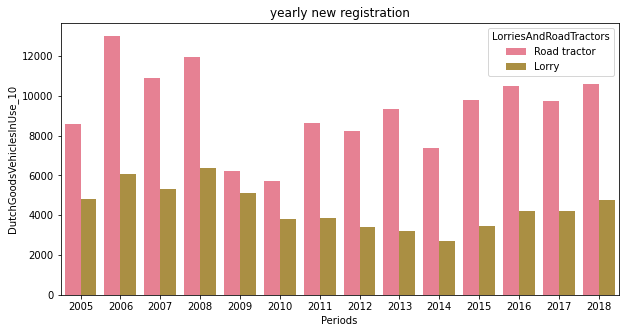

In [114]:
fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.barplot(x="Periods", y="DutchGoodsVehiclesInUse_10", 
                  hue="LorriesAndRoadTractors",
                  data=df_yearly_new_add)

ax.set_title('yearly new registration');

In [115]:
df_yearly_new_add = df_yearly_new_add[['LorriesAndRoadTractors','YearsOfConstruction','yearly_new_add']]
df_years_in_service = pd.merge(df_years_in_service, df_yearly_new_add,
         on = ['LorriesAndRoadTractors','YearsOfConstruction'])

In [116]:
df_years_in_service['DutchGoodsVehiclesInUse_%'] = df_years_in_service['DutchGoodsVehiclesInUse_10']/df_years_in_service['yearly_new_add']

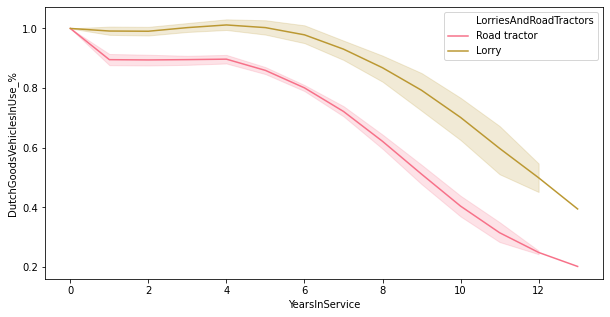

In [117]:
fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.lineplot(x="YearsInService", y="DutchGoodsVehiclesInUse_%", 
                  hue="LorriesAndRoadTractors",
                  data=df_years_in_service)

## link between kilometer and GDP


In [118]:
# read gdp, source 'world bank'
df_gdp = pd.read_csv('./data/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_1307332.csv', delimiter=',', skiprows= 4) 
df_gdp_nl = df_gdp[df_gdp['Country Name'] == 'Netherlands']
df_gdp_nl = df_gdp_nl.transpose()
# 

In [119]:
import numpy as np

In [120]:
# Drop non-numerical values
df_gdp_nl = df_gdp_nl[df_gdp_nl.applymap(np.isreal)]
df_gdp_nl.dropna(inplace=True)
df_gdp_nl.reset_index(inplace=True)

In [121]:
df_gdp_nl.columns = ['Periods','GDP growth [%]']

In [122]:
df_gdp_nl['Periods'] = df_gdp_nl['Periods'].astype('int');
df_gdp_nl['GDP growth [%]']= df_gdp_nl['GDP growth [%]'].astype('float');

In [123]:
df_yearly =  df.groupby(['Periods']).sum()

In [124]:
df_yearly.reset_index(inplace=True)

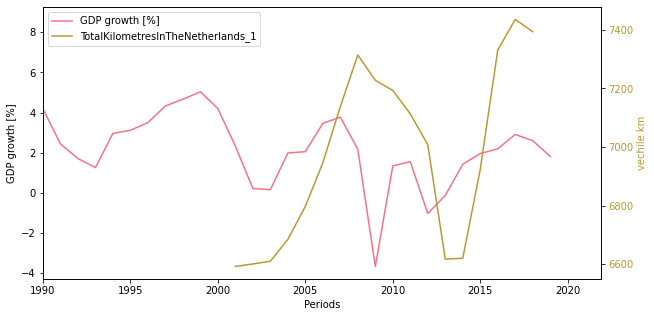

In [125]:
# fig, ax = plt.subplots()

ax = df_gdp_nl.plot(x = 'Periods', y = 'GDP growth [%]', figsize = (10, 5))
ax.set_ylabel('GDP growth [%]')
ax.set_xlim(left = 1990)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = sns.color_palette()[1]
ax2.set_ylabel('vechile km', color = color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor = color)

ax2.plot(df_yearly.Periods.astype('int').values, df_yearly.KilometresByDutchVehicles_2 + df_yearly.KilometresByForeignVehicles_3, 
         color = color, label = 'TotalKilometresInTheNetherlands_1')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')
plt.savefig('./image/vehicle_km_gdp.png', bbox_inches = 'tight')


# is the market owned by local v?


<AxesSubplot:xlabel='Periods'>

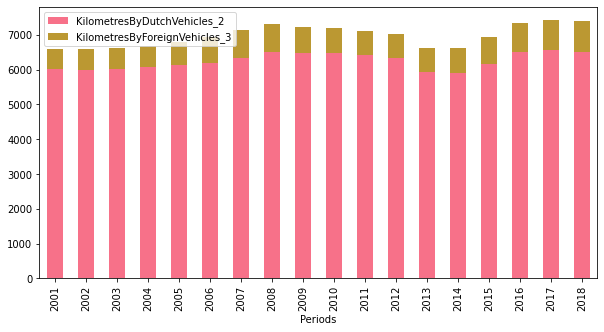

In [126]:

df_yearly.plot.bar( x= 'Periods', y = ['KilometresByDutchVehicles_2', "KilometresByForeignVehicles_3"],
                   figsize = (10, 5), stacked = True)

/Users/jinchaochen/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Periods'>

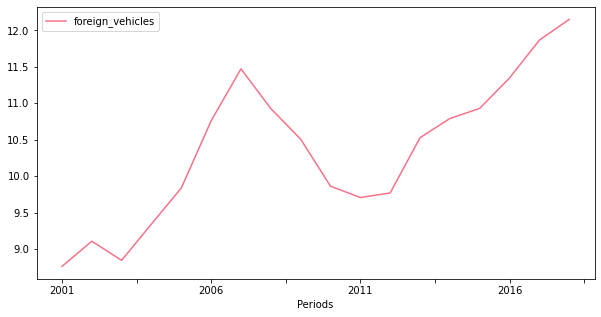

In [127]:
df_yearly['dutch_vehicles'] = df_yearly['KilometresByDutchVehicles_2']/(df_yearly['KilometresByDutchVehicles_2'] +  df_yearly["KilometresByForeignVehicles_3"])
df_yearly['foreign_vehicles'] = (1 - df_yearly['dutch_vehicles'])*100

df_yearly.plot( x= 'Periods', y = "foreign_vehicles",  figsize = (10, 5))

# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
# df_gdp_nl.plot(x = 'Periods', y = 'GDP growth [%]', figsize = (10, 5), ax = ax2)
# ax.set_ylabel('GDP growth [%]')
# ax.set_xlim(left = 1990)


# color = sns.color_palette()[1]
# ax2.set_ylabel('vechile km', color = color)  # we already handled the x-label with ax1
# ax2.tick_params(axis='y', labelcolor = color)
# # ax.legend([''])

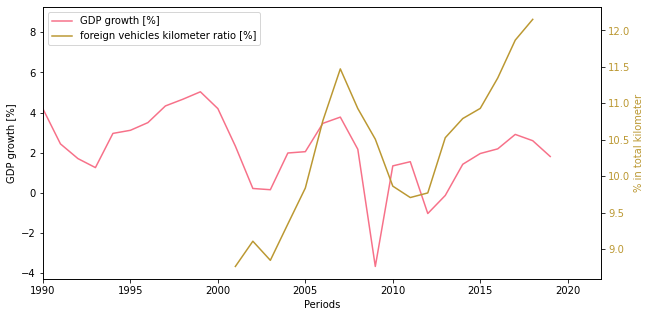

In [128]:
ax = df_gdp_nl.plot(x = 'Periods', y = 'GDP growth [%]', figsize = (10, 5))
ax.set_ylabel('GDP growth [%]')
ax.set_xlim(left = 1990)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = sns.color_palette()[1]
ax2.set_ylabel('% in total kilometer', color = color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor = color)

ax2.plot(df_yearly.Periods.astype('int').values, df_yearly.foreign_vehicles, 
         color = color, label = 'foreign vehicles kilometer ratio [%]')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')
plt.savefig('./image/foreign_v_gdp.png', bbox_inches = 'tight')